O t-SNE é uma excelente técnica para explorar como os dados se agrupam em um espaço de 2 ou 3 dimensões, especialmente se você tiver muitas variáveis numéricas e quiser observar como os pontos de dados se relacionam entre si. Aqui estão alguns passos para aplicar o t-SNE a esse tipo de conjunto de dados.

1. Preparação dos Dados
Antes de aplicar o t-SNE, realizamos um pré-processamento para garantir que as variáveis sejam numéricas e adequadas para análise. Algumas colunas como segmento, empresa, produto e customer precisaram ser transformadas, pois o t-SNE funciona com dados numéricos.

Codificação de variáveis categóricas: As variáveis foram codificadas usando Label Encoding.

Padronizamos as variáveis numéricas pois, o t-SNE pode ser sensível à escala dos dados.

2. Pré-processamento

a. Instalação as bibliotecas necessárias: pip install pandas scikit-learn matplotlib

In [ ]:
!pip install pandas scikit-learn matplotlib


b. Carregamento e pré-processamento dos dados:

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
dataf=pd.read_csv("base_unificada.csv", sep=";", encoding="cp1250")
#dataf.head(10)

c. Codificar variáveis categóricas com Label Encoding le = LabelEncoder()

In [ ]:
le = LabelEncoder()

d. Colunas que são variáveis categóricas

In [ ]:
dataf['segmento'] = le.fit_transform(dataf['segmento'])
dataf['empresa'] = le.fit_transform(dataf['empresa'])
dataf['produto'] = le.fit_transform(dataf['produto'])
dataf['customer'] = le.fit_transform(dataf['customer'])

e. Colunas numéricas para o t-SNE

In [ ]:
numerical_cols = ['quantidade', 'totalAmount', 'preparationTime', 'takeOutTimeInSeconds']
df_numerical = dataf[numerical_cols]

f. Padronizar as colunas numéricas

In [ ]:
scaler = StandardScaler()
df_numerical_scaled = scaler.fit_transform(df_numerical)

g. Aplicar t-SNE para reduzir para 2 dimensões

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_numerical_scaled)

h. Visualizar os resultados

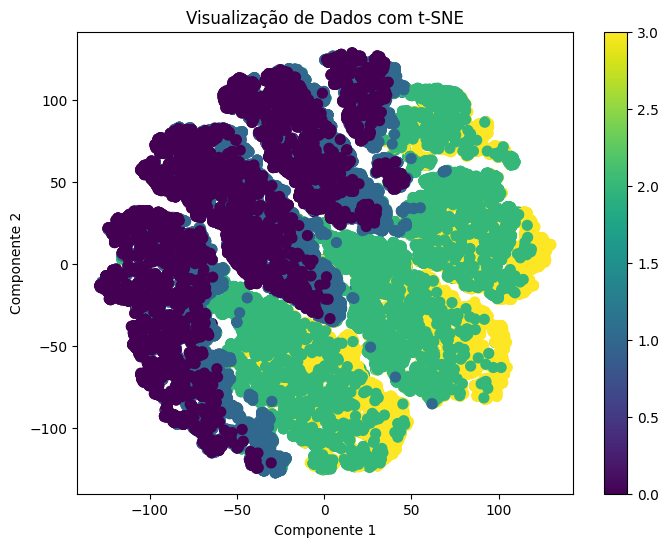

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dataf['segmento'], cmap='viridis', s=50)
plt.colorbar()
plt.title('Visualização de Dados com t-SNE')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

In [ ]:
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(df_numerical_scaled)

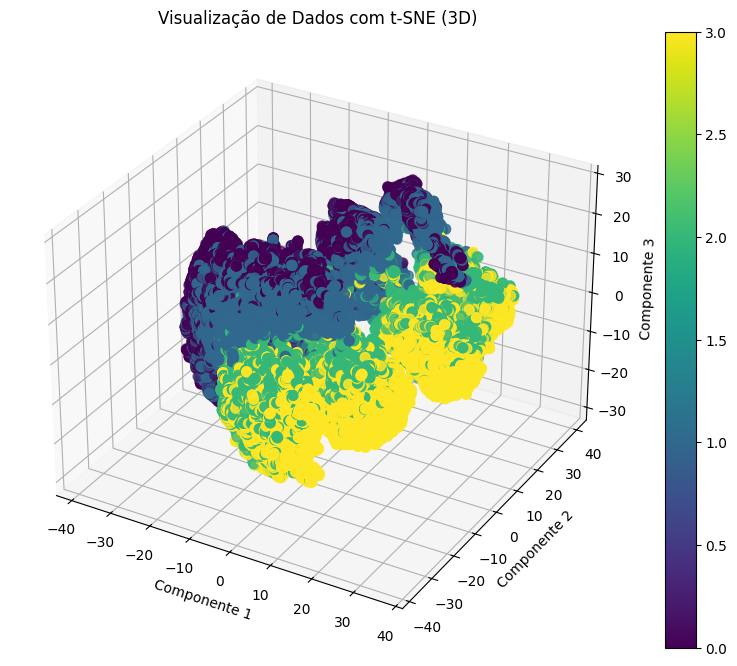

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2],
                c=dataf['segmento'], cmap='viridis', s=50)
plt.colorbar(sc)
ax.set_title('Visualização de Dados com t-SNE (3D)')
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
plt.show()

# Explicação do código:
1. Codificação de variáveis categóricas: Usamos o LabelEncoder para codificar as variáveis categóricas (segmento, empresa, produto, customer). Isso converte esses dados em valores numéricos.

2. Padronizamos: Como o t-SNE é sensível à escala das variáveis, as colunas numéricas foram padronizadas com o StandardScaler, o que garante que todas as variáveis tenham média 0 e desvio padrão 1.

3. Aplicanção t-SNE: Depois de padronizar os dados, aplicamos o t-SNE para reduzir a dimensionalidade de várias variáveis para apenas 2 dimensões, o que nos permite visualizar melhor os agrupamentos de dados.

4. Visualização: Utilizei o matplotlib para criar um gráfico de dispersão, onde os pontos são coloridos de acordo com a variável segmento (clientes).

Resumo interpretativo dos resultados do t-SNE:

Agrupamentos visuais:
Os gráficos 2D e 3D mostram blocos bem definidos de pontos com cores distintas. Isso indica que o t-SNE conseguiu projetar diferenças locais relevantes entre as amostras. Os grupos coloridos refletem regiões de alta similaridade nos dados originais.

Separação entre grupos:
Há regiões onde as cores estão bem separadas e outras onde há interpenetração. As áreas com separação nítida sugerem que as variáveis originais contêm padrões claros que diferenciam as classes. As zonas de sobreposição indicam similaridade entre categorias ou ruído nos dados.

Estrutura local preservada:
O t-SNE enfatiza vizinhanças locais, então pontos próximos na projeção tendem a ter perfis semelhantes em alta dimensão. A forma geral do gráfico não representa distância global real — grupos mais próximos na figura não necessariamente são próximos nos dados originais.

Influência dos parâmetros:
A forma e separação dos grupos dependem fortemente da perplexity e do learning rate (um hiperparâmetro em aprendizado de máquina que define o tamanho do ajuste nos parâmetros de um modelo a cada etapa do treinamento).

Interpretação das cores:
Como as cores representam classes conhecidas, observavamos blocos homogêneos (mesma cor) indicando boa distinção entre as categorias. Regiões multicoloridas apontam baixa separabilidade das classes pelas variáveis originais.

Limitações:

O t-SNE não preserva bem distâncias globais.

Densidades e tamanhos relativos de grupos podem ser artificiais.

Não deve ser usado para inferir clusters formais ou hierarquia entre grupos.

Conclusão:
O t-SNE revelou estrutura local significativa e indícios de separação entre classes, mas também zonas de mistura que sugerem sobreposição entre grupos. Os resultados foram interpretados como uma visualização exploratória — útil para entender padrões, mas não para conclusões quantitativas sobre distâncias ou fronteiras de classe.